In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("teacher_ratings.csv")
df.head()

,age,gender,beauty,eval,tenure,students,prof
0,57,Male,9.59,4.24,Yes,14,Prof_52
1,43,Male,9.53,9.58,No,38,Prof_93
2,36,Male,4.34,9.68,No,174,Prof_15
3,49,Male,6.13,9.40,Yes,145,Prof_72
4,47,Female,4.70,5.59,Yes,154,Prof_61


Q1. Regression with T-test: Does gender affect teaching evaluation rates?

                            OLS Regression Results                            
Dep. Variable:                   eval   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.462
Date:                Mon, 10 Nov 2025   Prob (F-statistic):             0.0658
Time:                        20:45:36   Log-Likelihood:                -213.00
No. Observations:                 100   AIC:                             430.0
Df Residuals:                      98   BIC:                             435.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.2057      0.310     20.

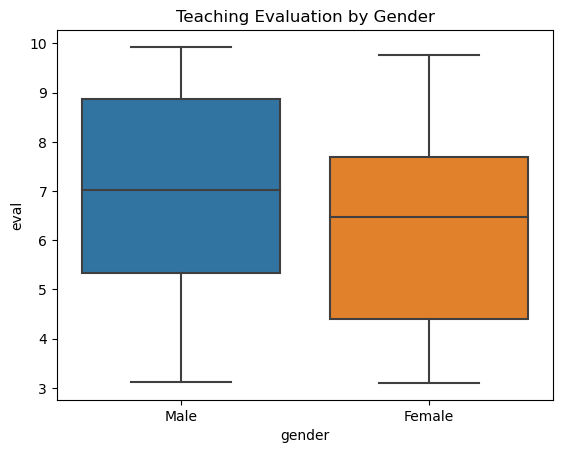

In [2]:
# Regression model: eval ~ gender
model_ttest = smf.ols('eval ~ gender', data=df).fit()
print(model_ttest.summary())

# Optional: Visual comparison
sns.boxplot(x='gender', y='eval', data=df)
plt.title("Teaching Evaluation by Gender")
plt.show()

Q2. Regression with ANOVA: Does beauty score differ by age?

                  sum_sq    df       F    PR(>F)
C(age_group)    8.622677   3.0  0.6212  0.603328
Residual      370.151119  80.0     NaN       NaN


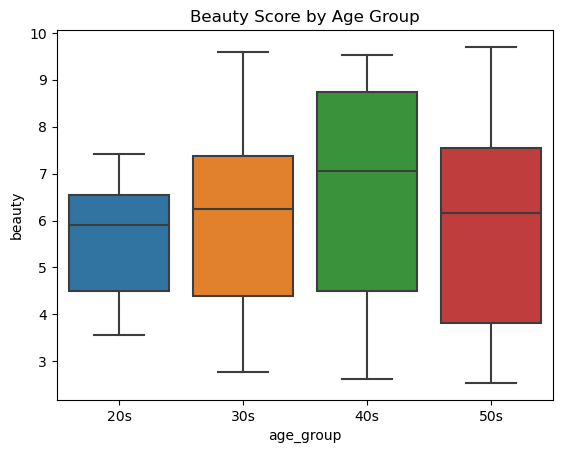

In [3]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60], labels=['20s','30s','40s','50s'])

# Fit ANOVA model
model_anova = smf.ols('beauty ~ C(age_group)', data=df).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
print(anova_table)

# Optional: Visualization
sns.boxplot(x='age_group', y='beauty', data=df)
plt.title("Beauty Score by Age Group")
plt.show()